In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy import integrate
from statsmodels.nonparametric.smoothers_lowess import lowess
from numpy.fft import fft
import statistics
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading from CSV Files**

In [3]:
# Reading from CSV files 
adult_ankle = pd.read_csv('Data/GroupData/adult_ankle.csv')
young_ankle = pd.read_csv('Data/GroupData/young_ankle.csv')
adult_hand = pd.read_csv('Data/GroupData/adult_hand.csv')
young_hand = pd.read_csv('Data/GroupData/young_hand.csv')
adult_pocket = pd.read_csv('Data/GroupData/adult_pocket.csv')
young_pocket = pd.read_csv('Data/GroupData/young_pocket.csv')

# **Plotting Histograms, Computing Means, Peforming Normality Tests**

1.2519315975224148
NormaltestResult(statistic=112.09267918558896, pvalue=4.564403019252423e-25)


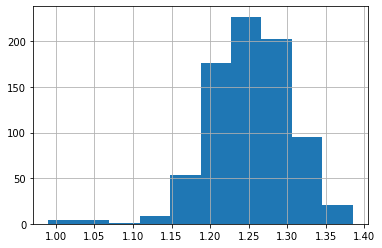

In [29]:
adult_ankle['AccNet'].hist()
print(adult_ankle['AccNet'].mean())
print(stats.normaltest(adult_ankle['AccNet']))

1.2135288274042155
NormaltestResult(statistic=84.47644019590682, pvalue=4.530791593511817e-19)


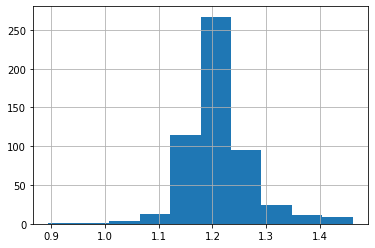

In [30]:
adult_hand['AccNet'].hist()
print(adult_hand['AccNet'].mean())
print(stats.normaltest(adult_hand['AccNet']))

1.0151349369194829
NormaltestResult(statistic=135.15907348362705, pvalue=4.472806428659619e-30)


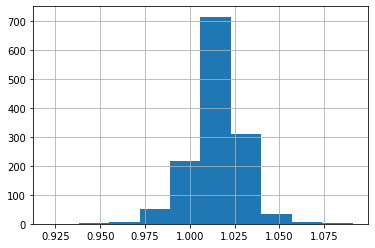

In [31]:
adult_pocket['AccNet'].hist()
print(adult_pocket['AccNet'].mean())
print(stats.normaltest(adult_pocket['AccNet']))

1.2684420795486977
NormaltestResult(statistic=242.37193245955564, pvalue=2.342090013527964e-53)


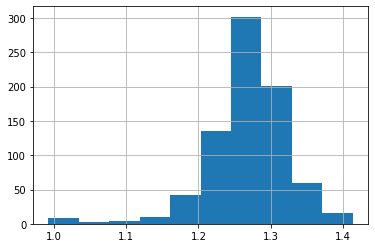

In [32]:
young_ankle['AccNet'].hist()
print(young_ankle['AccNet'].mean())
print(stats.normaltest(young_ankle['AccNet']))

1.4107180620606345
NormaltestResult(statistic=164.87653761053642, pvalue=1.5758495796836727e-36)


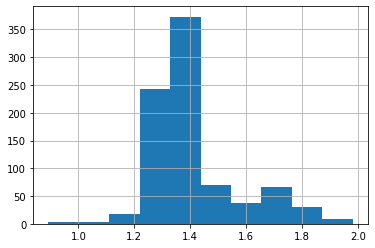

In [33]:
young_hand['AccNet'].hist()
print(young_hand['AccNet'].mean())
print(stats.normaltest(young_hand['AccNet']))

1.021931142988957
NormaltestResult(statistic=423.47464306061613, pvalue=1.1057314095993318e-92)


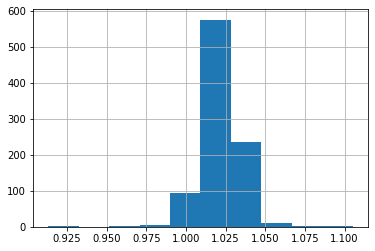

In [34]:
young_pocket['AccNet'].hist()
print(young_pocket['AccNet'].mean())
print(stats.normaltest(young_pocket['AccNet']))

**After performing the Normality Test and plotting Histograms, we find out that the data does not pass the normality test.
Hence, we will now use the Mann-Whitney U-Test to determine if the values of one group sort higher than the other.**

# **Mann-Whitney U-Test**

In [39]:
# Mann-Whitney U-test
# Adult

print('pvalue for Adult ankle vs pocket: ' + str(stats.mannwhitneyu(adult_ankle['AccNet'], adult_pocket['AccNet']).pvalue))
print('pvalue for Adult ankle vs hand: ' + str(stats.mannwhitneyu(adult_ankle['AccNet'], adult_hand['AccNet']).pvalue))
print('pvalue for Adult hand vs pocket: ' + str(stats.mannwhitneyu(adult_hand['AccNet'], adult_pocket['AccNet']).pvalue))

# Young
print('pvalue for Young ankle vs pocket: ' + str(stats.mannwhitneyu(young_ankle['AccNet'], young_pocket['AccNet']).pvalue))
print('pvalue for Young ankle vs hand: ' + str(stats.mannwhitneyu(young_ankle['AccNet'], young_hand['AccNet']).pvalue))
print('pvalue for Young hand vs pocket: ' + str(stats.mannwhitneyu(young_hand['AccNet'], young_pocket['AccNet']).pvalue))

pvalue for Adult ankle vs pocket: 0.0
pvalue for Adult ankle vs hand: 9.460402554149801e-45
pvalue for Adult hand vs pocket: 7.990730492757298e-247
pvalue for Young ankle vs pocket: 3.919213713444326e-269
pvalue for Young ankle vs hand: 4.2830034594867104e-150
pvalue for Young hand vs pocket: 1.272432180211668e-286


**Since, we are getting very small pvalues for all the pairs of groups, hence we can say that values from one group tend to sort higher than others.**

## **Computing Velocity from Instantaneous Acceleration**
(integrating with respect to time)

In [53]:
# Compute Velocity using Instantaneous Acceleration
# Adult Ankle
aa_inst_acc = np.zeros(len(adult_ankle['AccNet'])) 
for i in range(0,len(adult_ankle['AccNet'])):
  if i==0:
    aa_inst_acc[0] = adult_ankle['AccNet'].iloc[0]
  else:
    aa_inst_acc[i] = adult_ankle['AccNet'].iloc[i] - adult_ankle['AccNet'].iloc[i-1]

adult_ankle['AccInst'] = aa_inst_acc
aa_vel = integrate.trapz(adult_ankle['AccInst'])
print(aa_vel)

0.8054003965679916


In [54]:
# Young Ankle
ya_inst_acc = np.zeros(len(young_ankle['AccNet'])) 
for i in range(0,len(young_ankle['AccNet'])):
  if i==0:
    ya_inst_acc[0] = young_ankle['AccNet'].iloc[0]
  else:
    ya_inst_acc[i] = young_ankle['AccNet'].iloc[i] - young_ankle['AccNet'].iloc[i-1]

young_ankle['AccInst'] = ya_inst_acc
ya_vel = integrate.trapz(young_ankle['AccInst'])
print(ya_vel)

0.6486400170195591


In [55]:
# Adult Hand
ah_inst_acc = np.zeros(len(adult_hand['AccNet'])) 
for i in range(0,len(adult_hand['AccNet'])):
  if i==0:
    ah_inst_acc[0] = adult_hand['AccNet'].iloc[0]
  else:
    ah_inst_acc[i] = adult_hand['AccNet'].iloc[i] - adult_hand['AccNet'].iloc[i-1]

adult_hand['AccInst'] = ah_inst_acc
ah_vel = integrate.trapz(adult_hand['AccInst'])
print(ah_vel)

0.5288330329006492


In [56]:
# Young Hand
yh_inst_acc = np.zeros(len(young_hand['AccNet'])) 
for i in range(0,len(young_hand['AccNet'])):
  if i==0:
    yh_inst_acc[0] = young_hand['AccNet'].iloc[0]
  else:
    yh_inst_acc[i] = young_hand['AccNet'].iloc[i] - young_hand['AccNet'].iloc[i-1]

young_hand['AccInst'] = yh_inst_acc
yh_vel = integrate.trapz(young_hand['AccInst'])
print(yh_vel)

0.3727830620087338


In [57]:
# Adult Pocket
ap_inst_acc = np.zeros(len(adult_pocket['AccNet'])) 
for i in range(0,len(adult_pocket['AccNet'])):
  if i==0:
    ap_inst_acc[0] = adult_pocket['AccNet'].iloc[0]
  else:
    ap_inst_acc[i] = adult_pocket['AccNet'].iloc[i] - adult_pocket['AccNet'].iloc[i-1]

adult_pocket['AccInst'] = ap_inst_acc
ap_vel = integrate.trapz(adult_pocket['AccInst'])
print(ap_vel)

0.5135805081302738


In [58]:
# Young Pocket
yp_inst_acc = np.zeros(len(young_pocket['AccNet'])) 
for i in range(0,len(young_pocket['AccNet'])):
  if i==0:
    yp_inst_acc[0] = young_pocket['AccNet'].iloc[0]
  else:
    yp_inst_acc[i] = young_pocket['AccNet'].iloc[i] - young_pocket['AccNet'].iloc[i-1]

young_pocket['AccInst'] = yp_inst_acc
yp_vel = integrate.trapz(young_pocket['AccInst'])
print(yp_vel)

0.4986541038387076


## **Comparing Computed Velocity Values to Actual Values**

In [74]:
result_table = {'Location': ['Ankle', 'Ankle', 'Hand', 'Hand', 'Pocket', 'Pocket'],
                'Age': ['Adult', 'Young', 'Adult', 'Young', 'Adult', 'Young'],
                'Distance (m) (from data)': [890, 870, 620,1050, 1460, 950],
                'Time (s)': [len(adult_ankle), len(young_ankle), len(adult_hand), len(young_hand), len(adult_pocket), len(young_pocket)],
                'Computed Velocity (m/s)': [aa_vel, ya_vel, ah_vel, yh_vel, ap_vel, yp_vel]}
df_result = pd.DataFrame(result_table, columns=['Location', 'Age', 'Distance (m) (from data)', 'Time (s)', 'Computed Velocity (m/s)'])

In [75]:
df_result['Actual Velocity (m/s)'] = df_result['Distance (m) (from data)']/df_result['Time (s)']
df_result['Percent Difference (%)'] = ((df_result['Actual Velocity (m/s)']-df_result['Computed Velocity (m/s)'])/df_result['Actual Velocity (m/s)'])*100

In [76]:
df_result

,Location,Age,Distance (m) (from data),Time (s),Computed Velocity (m/s),Actual Velocity (m/s),Percent Difference (%)
0,Ankle,Adult,890,793,0.805400,1.122320,28.237920
1,Ankle,Young,870,781,0.648640,1.113956,41.771511
2,Hand,Adult,620,538,0.528833,1.152416,54.110940
3,Hand,Young,1050,851,0.372783,1.233843,69.786820
4,Pocket,Adult,1460,1341,0.513581,1.088740,52.827982
5,Pocket,Young,950,928,0.498654,1.023707,51.289368


**Here, we can observe that the percent difference among the various groups.
It appears to be that the percent difference is least for the readings located at the ankle. Hence, we can say that the device located at Ankle gave better readings in comparison to the device located at Pocket and Hand.**